# MANUAL NET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import glob
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from PIL import Image

from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
Mild = 'dataset/train/Mild'
Moderate = 'dataset/train/Moderate'
No_DR = 'dataset/train/No_DR'
Proliferate_DR = 'dataset/train/Proliferate_DR'
Severe = 'dataset/train/Severe'

In [4]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(80, 40))
    for idx, img_path in enumerate(item_files):
        plt.subplot(3, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    
def image_details_print(data,path):
    print('======== Images in: ', path)
    for key,values in data.items():
        print(key,':\t', values)


def images_details(path):
    files=[f for f in glob.glob(path + "**/*.*", recursive=True)]
    data={}
    data['Images_count']=len(files)
    data['Min_width']=10**100
    data['Max_width']=0
    data['Min_height']=10**100
    data['Max_height']=0
    
    for f in files:
        img=Image.open(f)
        width,height=img.size
        data['Min_width']=min(width,data['Min_width'])
        data['Max_width']=max(width, data['Max_width'])
        data['Min_height']=min(height, data['Min_height'])
        data['Max_height']=max(height, data['Max_height'])
        
    image_details_print(data,path)


TRAINING DATA FOR Mild:

======== Images in:  dataset/train/Mild
Images_count :	 200
Min_width :	 224
Max_width :	 224
Min_height :	 224
Max_height :	 224



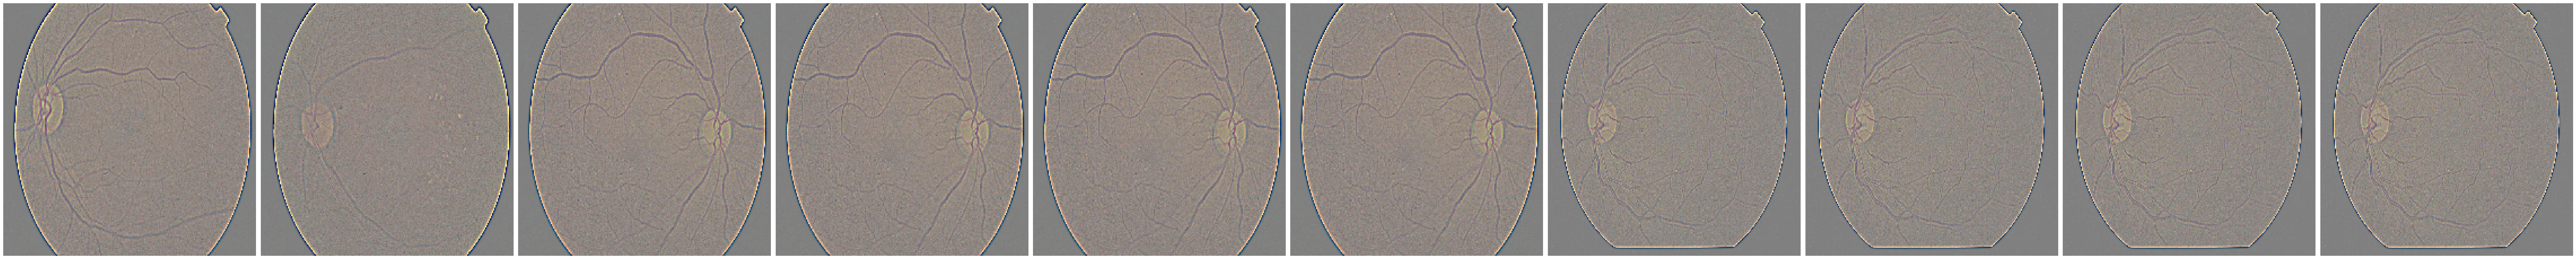

In [5]:
print("")
print("TRAINING DATA FOR Mild:")
print("")
images_details(Mild)
print("")
plot_images(Mild, 10) 


TRAINING DATA FOR Moderate:

======== Images in:  dataset/train/Moderate
Images_count :	 200
Min_width :	 224
Max_width :	 224
Min_height :	 224
Max_height :	 224



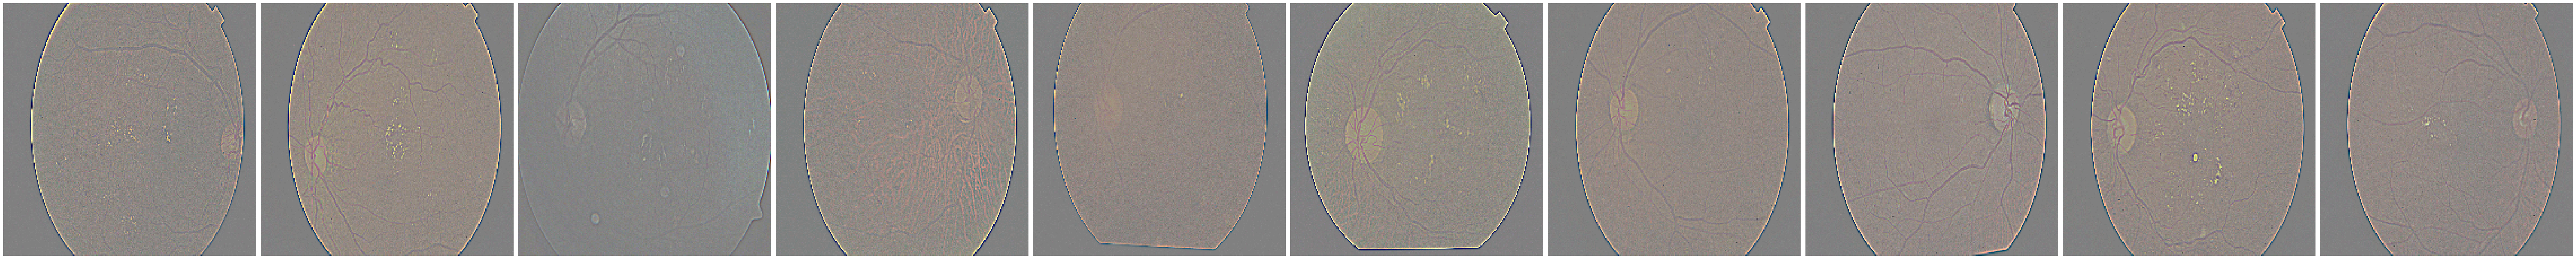

In [6]:
print("")
print("TRAINING DATA FOR Moderate:")
print("")
images_details(Moderate)
print("")
plot_images(Moderate, 10)


TRAINING DATA FOR No_DR:

======== Images in:  dataset/train/No_DR
Images_count :	 200
Min_width :	 224
Max_width :	 224
Min_height :	 224
Max_height :	 224



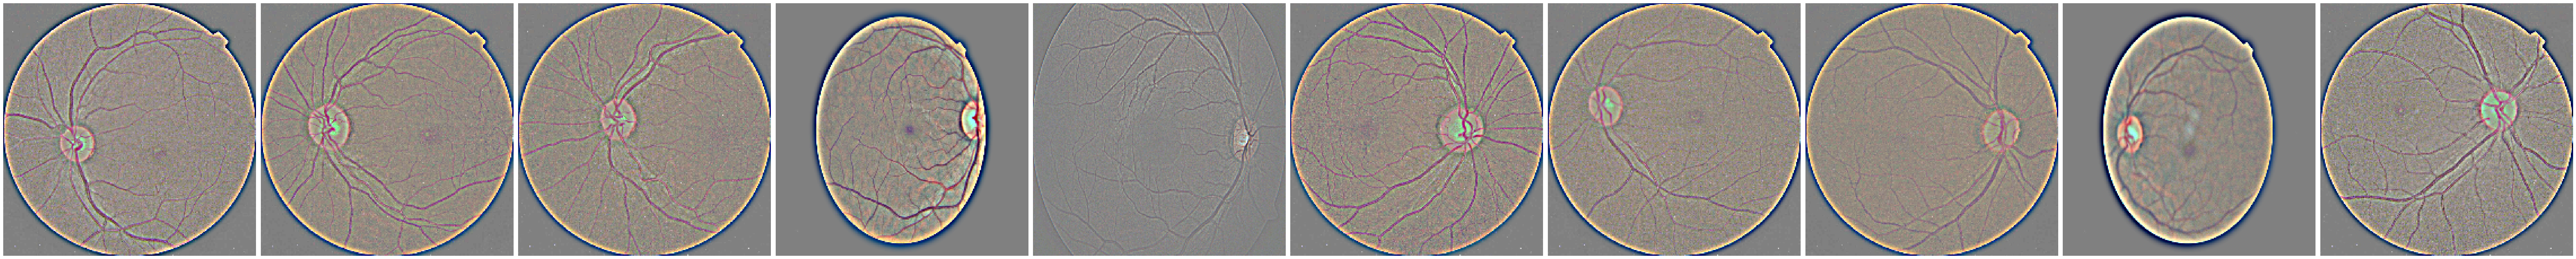

In [7]:
print("")
print("TRAINING DATA FOR No_DR:")
print("")
images_details(No_DR)
print("")
plot_images(No_DR, 10)


TRAINING DATA FOR Proliferate_DR:

======== Images in:  dataset/train/Proliferate_DR
Images_count :	 172
Min_width :	 224
Max_width :	 224
Min_height :	 224
Max_height :	 224



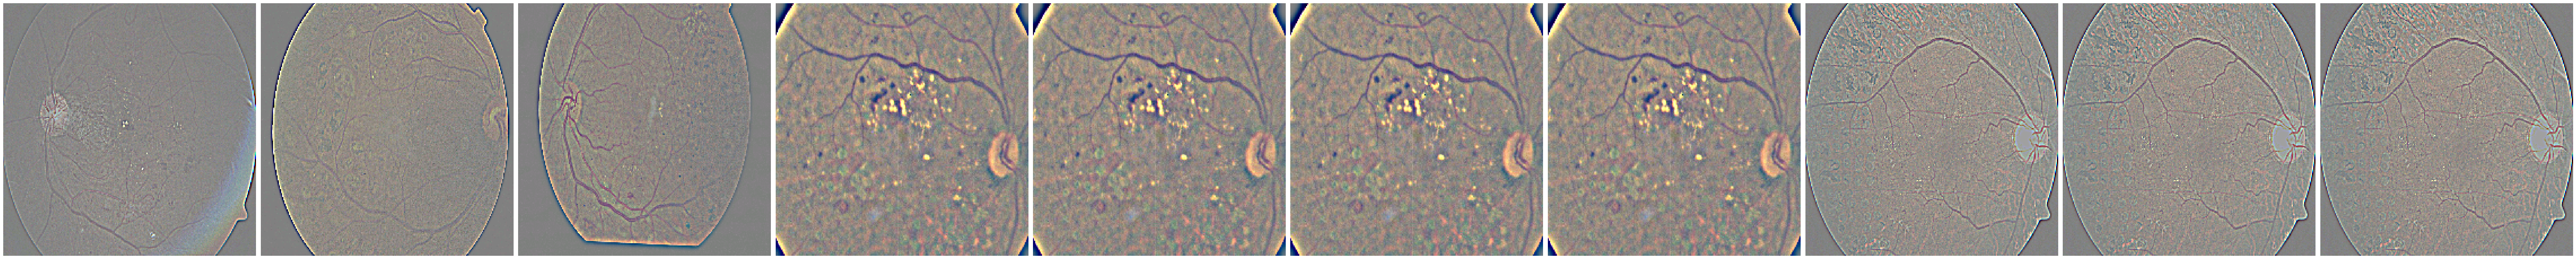

In [8]:
print("")
print("TRAINING DATA FOR Proliferate_DR:")
print("")
images_details(Proliferate_DR)
print("")
plot_images(Proliferate_DR, 10)


TRAINING DATA FOR Severe:

======== Images in:  dataset/train/Severe
Images_count :	 192
Min_width :	 224
Max_width :	 224
Min_height :	 224
Max_height :	 224



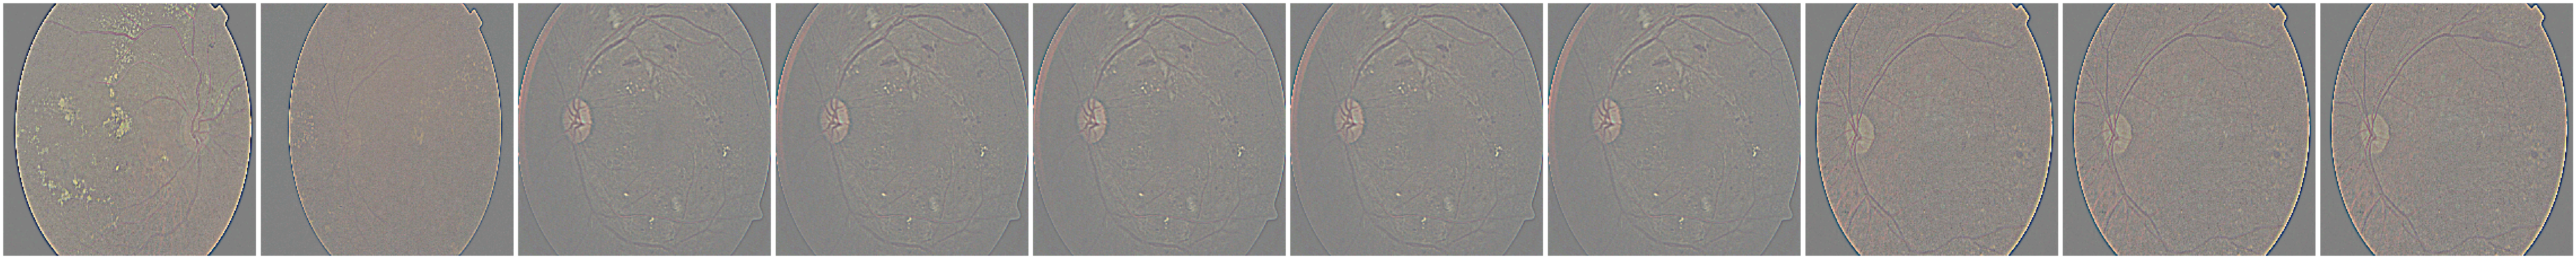

In [9]:
print("")
print("TRAINING DATA FOR Severe:")
print("")
images_details(Severe)
print("")
plot_images(Severe, 10)

In [10]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('dataset/train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 964 images belonging to 5 classes.


In [11]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('dataset/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 964 images belonging to 5 classes.


In [12]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))
Classifier.add(Dense(5, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model_path = "MANUAL.h5"

callbacks = [
    ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)
]

In [14]:
epochs = 10
batch_size = 512

In [15]:
#### Fitting the model
history = Classifier.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=callbacks)

Epoch 1/10


1/1 [==============================] - ETA: 0s - loss: 1.5600 - accuracy: 0.3750
Epoch 1: accuracy improved from -inf to 0.37500, saving model to MANUAL.h5
1/1 [==============================] - 2s 2s/step - loss: 1.5600 - accuracy: 0.3750 - val_loss: 142.9346 - val_accuracy: 0.1562
Epoch 2/10
1/1 [==============================] - ETA: 0s - loss: 107.4403 - accuracy: 0.2812
Epoch 2: accuracy did not improve from 0.37500
1/1 [==============================] - 1s 1s/step - loss: 107.4403 - accuracy: 0.2812 - val_loss: 70.6110 - val_accuracy: 0.0625
Epoch 3/10
1/1 [==============================] - ETA: 0s - loss: 58.7309 - accuracy: 0.1875
Epoch 3: accuracy did not improve from 0.37500
1/1 [==============================] - 1s 1s/step - loss: 58.7309 - accuracy: 0.1875 - val_loss: 25.5165 - val_accuracy: 0.0625
Epoch 4/10
1/1 [==============================] - ETA: 0s - loss: 11.3762 - accuracy: 0.3438
Epoch 4: accuracy did not improve from 0.37500
1/1 [====================

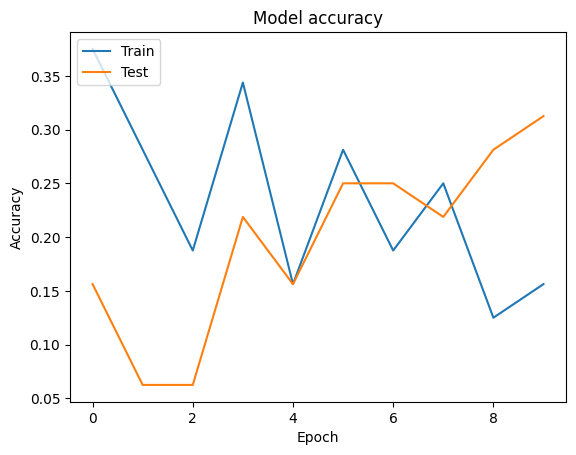

In [16]:
import matplotlib.pyplot as plt

def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

graph()

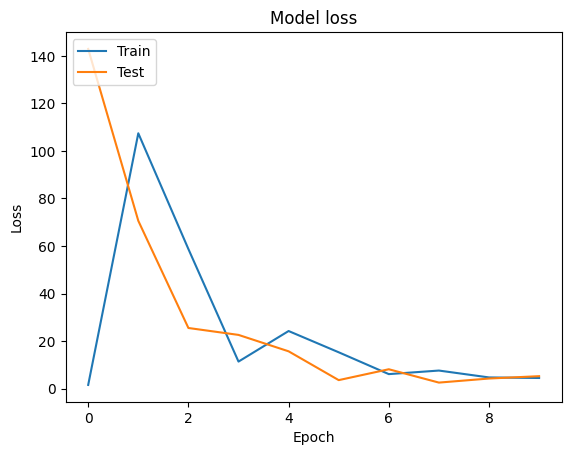

In [17]:
import matplotlib.pyplot as plt

def graph():
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()